In [1]:
# Analiza wag składowych

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# =============================
# 1. Wczytanie danych
# =============================
dataset = pd.read_csv("dane.txt", sep='\s+', header=0)
print(dataset.head())

   par1  par2  par3  par4 grupa
0   7.9  12.1   2.1  19.1     V
1   9.4  13.4   1.9  18.8     V
2   8.5  11.8   1.7  21.1     V
3   1.2   3.7   6.3  55.2     W
4   8.8  14.3   7.7  58.4     U


In [3]:
# =============================
# 2. Podział na zmienne objaśniające i klasę
# =============================
X = dataset.values[:,0:4] # Zmienne objaśniające
y = dataset['grupa']

In [4]:
# =============================
# 3. Autoskalowanie
# =============================
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) # Autoskalowanie

In [5]:
# =============================
# 4. PCA
# =============================
pca = PCA(n_components=4)
modelPC = pca.fit(X)


Explained variance / %: 
 81.67
 17.62
 0.65
 0.06


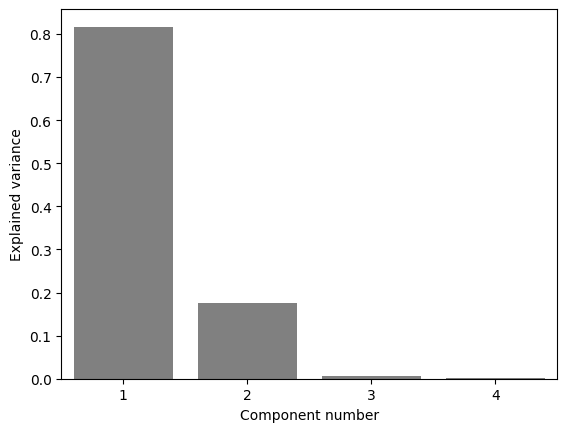

In [6]:
# =============================
# 5. Analiza wariancji opisanej przez PC
# =============================
print('\nExplained variance / %: ')
for i in range(4):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])

splot = sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

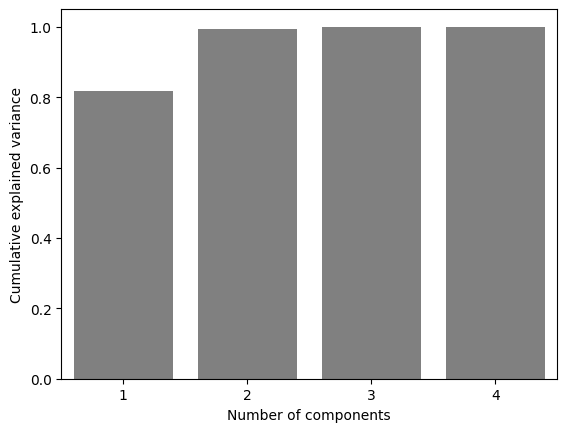

In [7]:
# =============================
# 6. Skumulowana zmienność
# =============================
sns.barplot(x=np.arange(1,5), y=np.cumsum(pca.explained_variance_ratio_), color='grey')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Component loadings :
 PC1 PC2
par1 -0.51  0.45
par2 -0.49  0.55
par3  0.49  0.57
par4  0.52  0.42


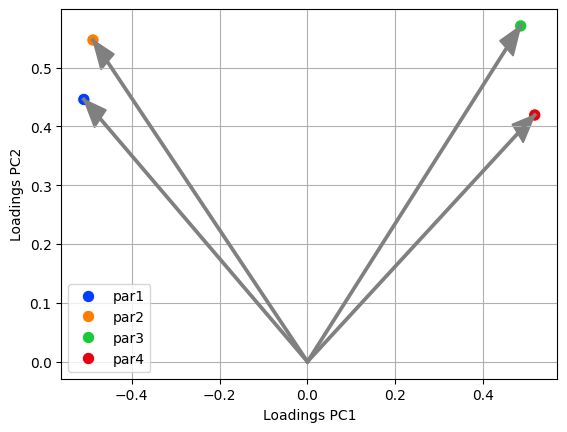

In [ ]:
# =============================
# 7. Wagi składowych (loadings)
# =============================
print('\nComponent loadings :') # Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(4):
  print(dataset.columns[i], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' % (modelPC.components_)[1,i])
# wagi to wartości własne macierzy kowariancji
sns.scatterplot(x=modelPC.components_[0,:], y=modelPC.components_[1,:], hue=dataset.columns[0:4], palette='bright',s=80)
for i in range(0,4): # Wektory wskazujące wagi składowych
  ax=sns.lineplot(x=[0,modelPC.components_[0,i]], y=[0,modelPC.components_[1,i]], color='grey', linewidth=2.7)
  ax.arrow(0,0, modelPC.components_[0,i], modelPC.components_[1,i], lw=1, color='grey', head_length=.05, head_width=.04, length_includes_head=True)
plt.xlabel('Loadings PC1')
plt.ylabel('Loadings PC2')
plt.grid()
plt.show()


 Results :


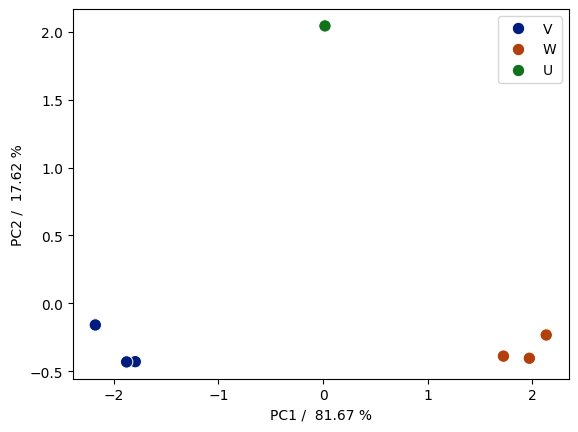

In [10]:
# =============================
# 8. Rzut danych na płaszczyznę PC1/PC2
# =============================
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y, legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show()


 Results :


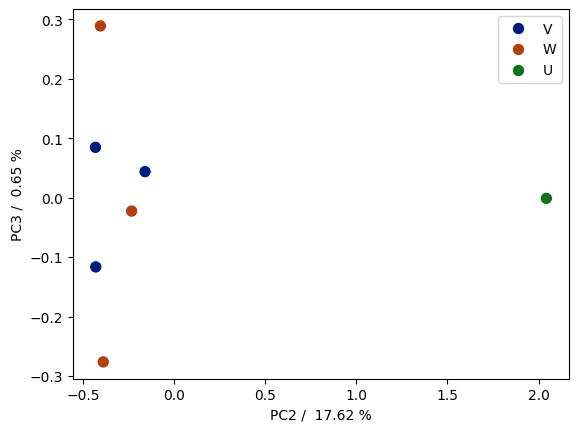

In [12]:
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,1], y=PC[:,2], palette='dark', hue=y, legend='full', s=80)
plt.xlabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()


 Results :


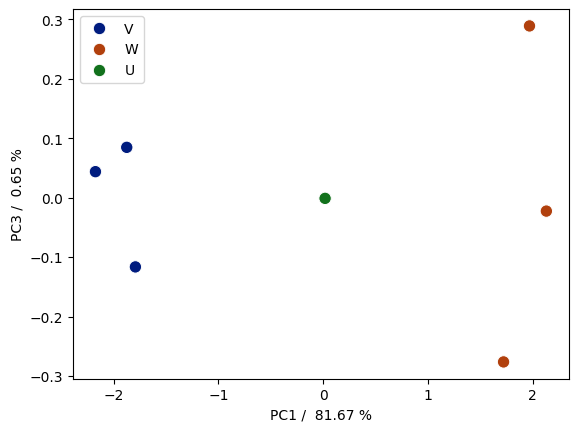

In [13]:
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,2], palette='dark', hue=y, legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()

In [ ]:
# Bez autoskalowania
# =============================
# 1.2 Wczytanie danych
# =============================
dataset2 = pd.read_csv("dane.txt", sep='\s+', header=0)
print(dataset2.head())

   par1  par2  par3  par4 grupa
0   7.9  12.1   2.1  19.1     V
1   9.4  13.4   1.9  18.8     V
2   8.5  11.8   1.7  21.1     V
3   1.2   3.7   6.3  55.2     W
4   8.8  14.3   7.7  58.4     U


In [15]:
# =============================
# 2.2 Podział na zmienne objaśniające i klasę
# =============================
X2 = dataset2.values[:,0:4] # Zmienne objaśniające
y2 = dataset2['grupa']

In [16]:
# =============================
# 3.2 PCA
# =============================
pca = PCA(n_components=4)
modelPC2 = pca.fit(X2)


Explained variance / %: 
 94.92
 4.97
 0.11
 0.01


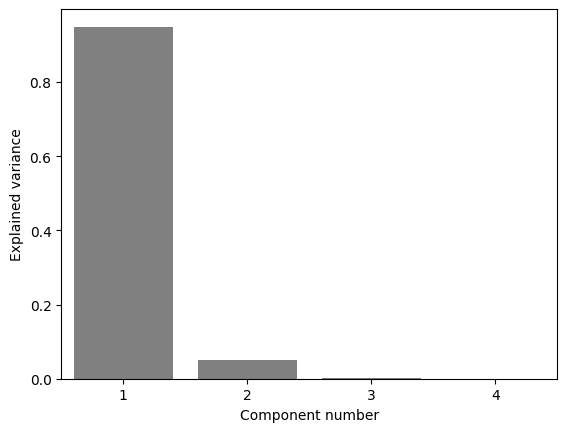

In [17]:
# =============================
# 4.2 Analiza wariancji opisanej przez PC
# =============================
print('\nExplained variance / %: ')
for i in range(4):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])

splot = sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

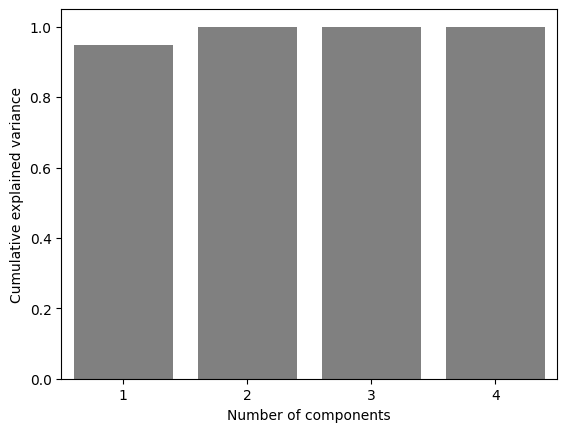

In [18]:
# =============================
# 5.2 Skumulowana zmienność
# =============================
sns.barplot(x=np.arange(1,5), y=np.cumsum(pca.explained_variance_ratio_), color='grey')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Component loadings :
 PC1 PC2
par1 -0.13  0.49
par2 -0.19  0.84
par3  0.12  0.10
par4  0.96  0.22


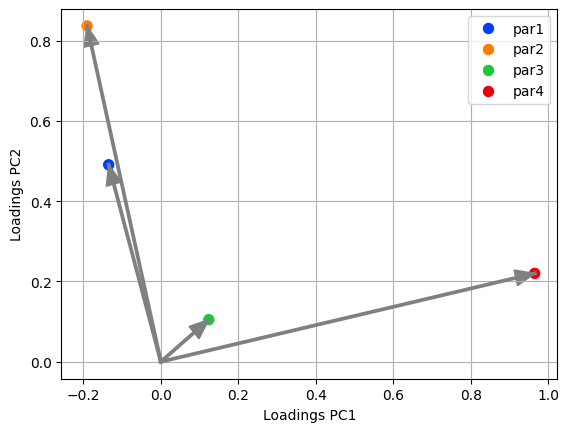

In [20]:
# =============================
# 6.2 Wagi składowych (loadings)
# =============================
print('\nComponent loadings :') # Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(4):
  print(dataset.columns[i], '% 4.2f' % (modelPC2.components_)[0,i], '% 4.2f' % (modelPC2.components_)[1,i])
# wagi to wartości własne macierzy kowariancji
sns.scatterplot(x=modelPC2.components_[0,:], y=modelPC2.components_[1,:], hue=dataset.columns[0:4], palette='bright',s=80)
for i in range(0,4): # Wektory wskazujące wagi składowych
  ax=sns.lineplot(x=[0,modelPC2.components_[0,i]], y=[0,modelPC2.components_[1,i]], color='grey', linewidth=2.7)
  ax.arrow(0,0, modelPC2.components_[0,i], modelPC2.components_[1,i], lw=1, color='grey', head_length=.05, head_width=.04, length_includes_head=True)
plt.xlabel('Loadings PC1')
plt.ylabel('Loadings PC2')
plt.grid()
plt.show()


 Results :


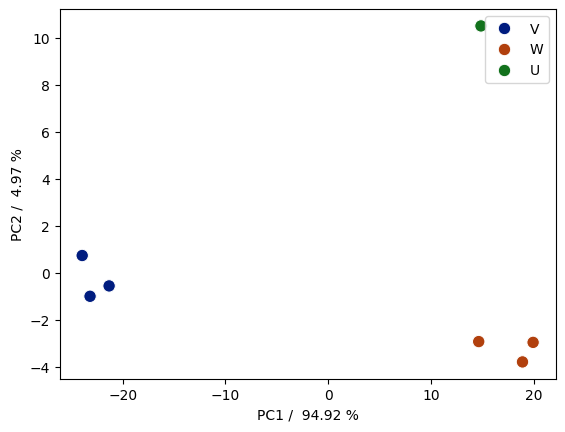

In [21]:
# =============================
# 7.2 Rzut danych na płaszczyznę PC1/PC2
# =============================
print('\n Results :')
PC = modelPC2.transform(X2)
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y2, legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show()


 Results :


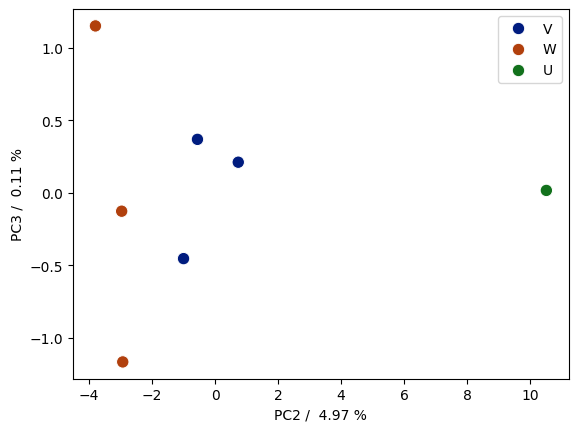

In [23]:
print('\n Results :')
PC = modelPC2.transform(X2)
sns.scatterplot(x=PC[:,1], y=PC[:,2], palette='dark', hue=y2, legend='full', s=80)
plt.xlabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()


 Results :


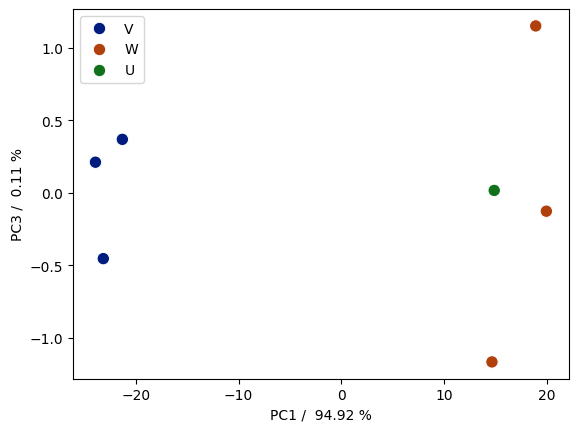

In [24]:
print('\n Results :')
PC = modelPC2.transform(X2)
sns.scatterplot(x=PC[:,0], y=PC[:,2], palette='dark', hue=y2, legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()